# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
#%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [34]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

In [3]:
df['city_type'].unique()

array(['<100', 'Mega', '100-500', '1M+', '500-1000'], dtype=object)

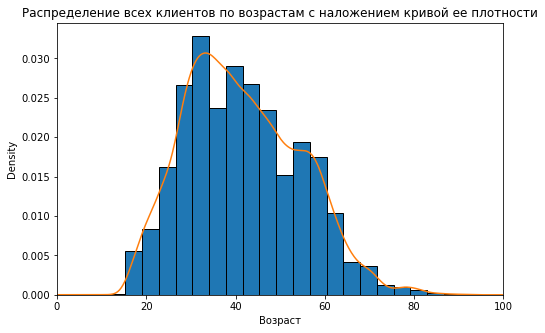

In [4]:
plt.figure(figsize=(8,5))
plt.hist(df['age'], edgecolor='black', bins=25, density=True)
plt.xlabel('Возраст')
df.age.plot.kde()
plt.xlim((0,100))
plt.title("Распределение всех клиентов по возрастам с наложением кривой ее плотности");

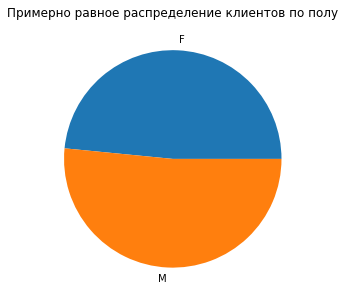

In [5]:
plt.figure(figsize=(5,5))
df.groupby('gender')['age'].count().plot(kind='pie')
plt.title("Примерно равное распределение клиентов по полу")
plt.ylabel('');

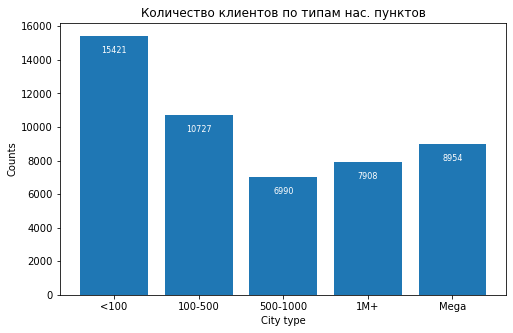

In [6]:
city_cat = ['<100', '100-500', '500-1000', '1M+', 'Mega']
height = [df.groupby('city_type')['age'].count()[i] for i in city_cat]
y_pos = np.arange(len(city_cat))
plt.figure(figsize=(8,5))
bars = plt.bar(y_pos, height)
plt.xticks(y_pos, city_cat)
plt.xlabel('City type')
plt.ylabel('Counts')
plt.title('Количество клиентов по типам нас. пунктов')
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 1000, str(int(bar.get_height())), 
                   ha='center', color='w', fontsize=8)

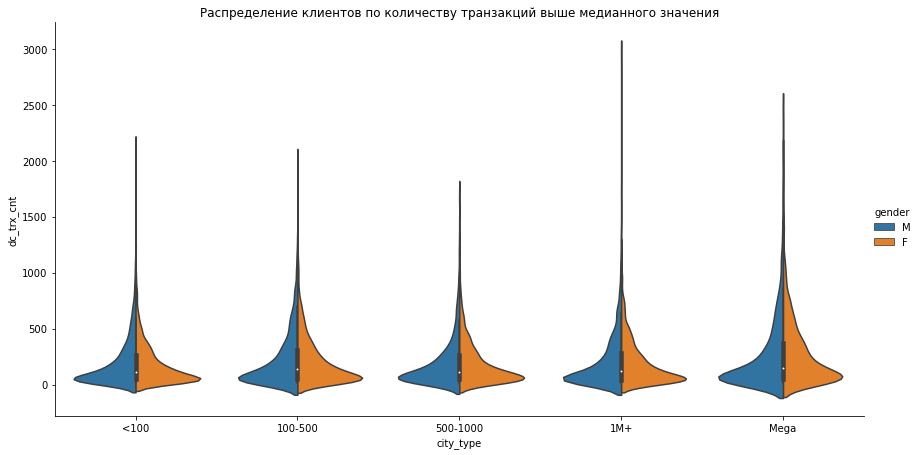

In [7]:
sns.catplot(
    x='city_type', 
    y='dc_trx_cnt', 
    data=df.query('dc_trx_cnt > 14'), 
    kind='violin', 
    hue='gender',
    split=True,
    order=city_cat,
    height=6, 
    aspect=2)
plt.title('Распределение клиентов по количеству транзакций выше медианного значения'); 

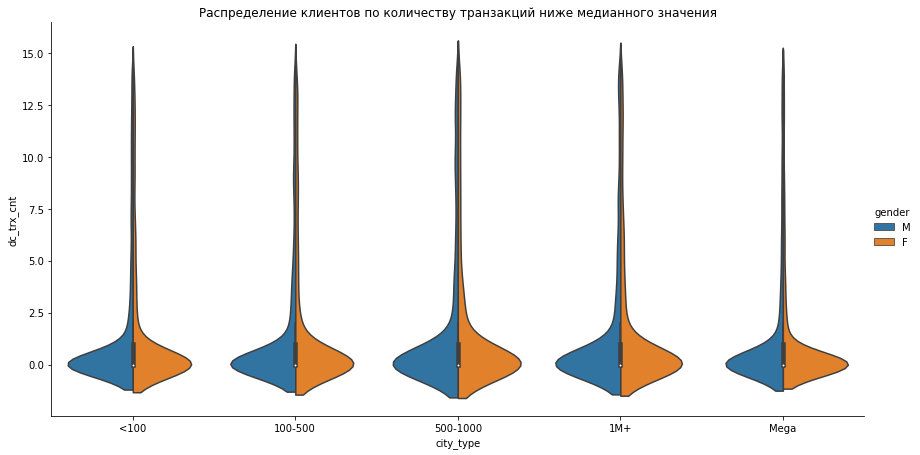

In [8]:
sns.catplot(
    x='city_type', 
    y='dc_trx_cnt', 
    data=df.query('dc_trx_cnt <= 14'), 
    kind='violin', 
    hue='gender',
    split=True,
    order=city_cat,
    height=6, 
    aspect=2)
plt.title('Распределение клиентов по количеству транзакций ниже медианного значения'); 

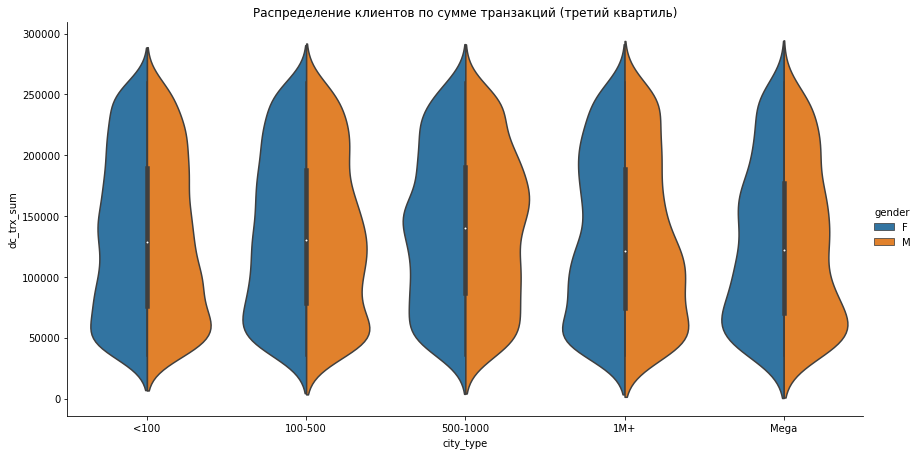

In [9]:
sns.catplot(
    x='city_type', 
    y='dc_trx_sum', 
    data=df.query('dc_trx_sum > 3.500108e+04 & dc_trx_sum < 2.603239e+05'), 
    kind='violin', 
    hue='gender',
    split=True,
    order=city_cat,
    height=6, 
    aspect=2)
plt.title('Распределение клиентов по сумме транзакций (третий квартиль)');  

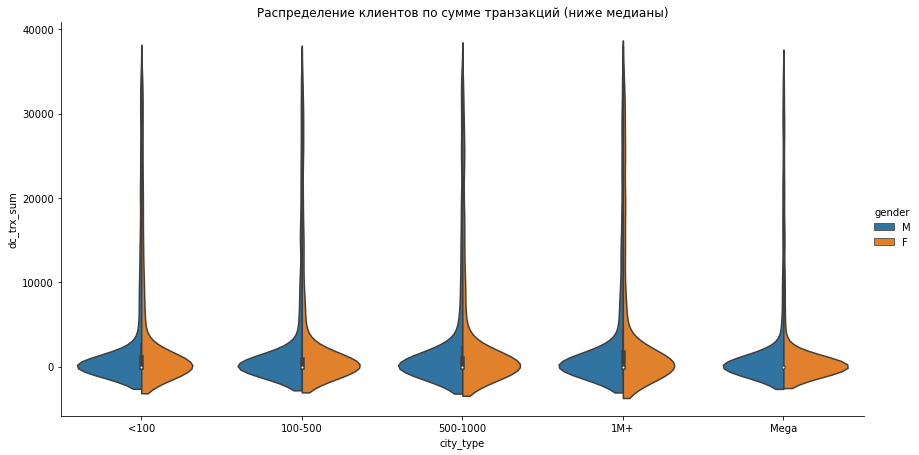

In [10]:
sns.catplot(
    x='city_type', 
    y='dc_trx_sum', 
    data=df.query('dc_trx_sum <= 3.500108e+04'), 
    kind='violin', 
    hue='gender',
    split=True,
    order=city_cat,
    height=6, 
    aspect=2)
plt.title('Распределение клиентов по сумме транзакций (ниже медианы)');  

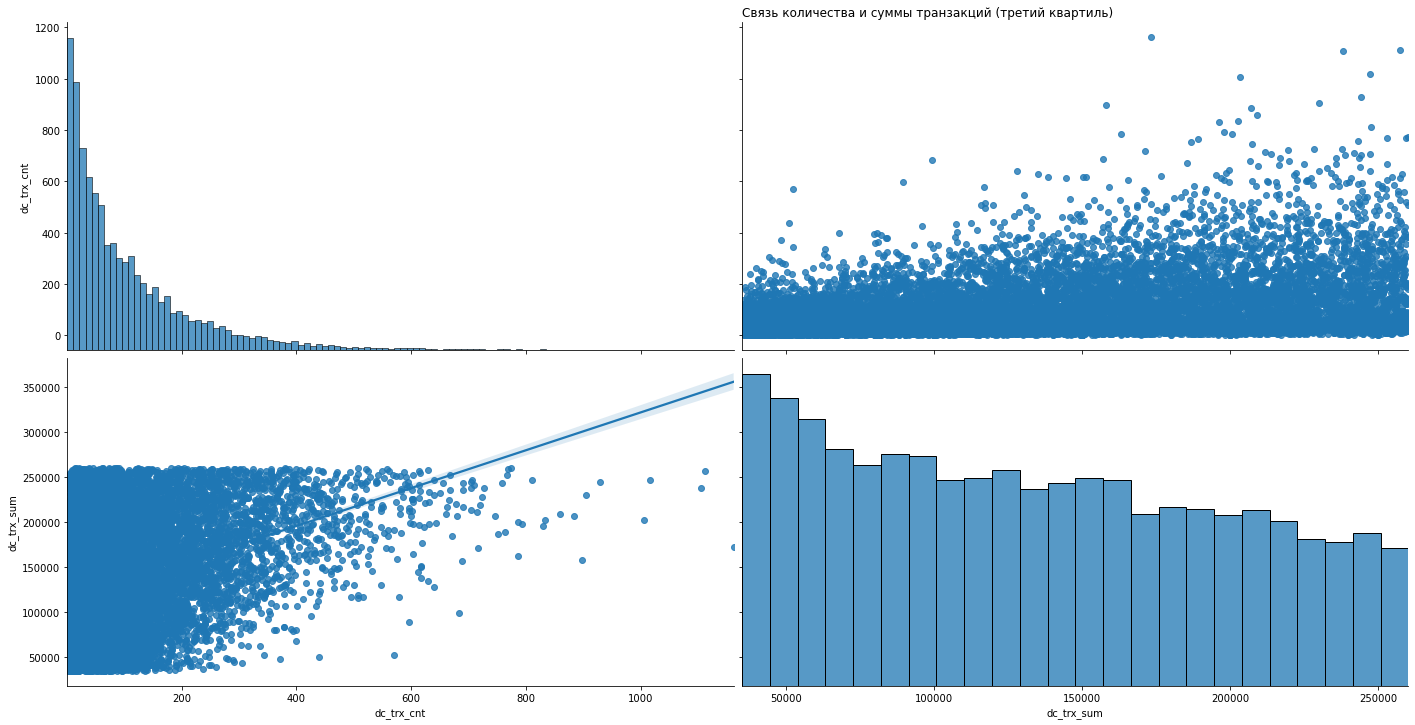

In [11]:
sns.pairplot(
    df.query('dc_trx_sum > 3.500108e+04 & dc_trx_sum < 2.603239e+05'),
    vars=['dc_trx_cnt', 'dc_trx_sum'], kind='reg', height=5, aspect=2)
plt.title('Связь количества и суммы транзакций (третий квартиль)', loc='left');  

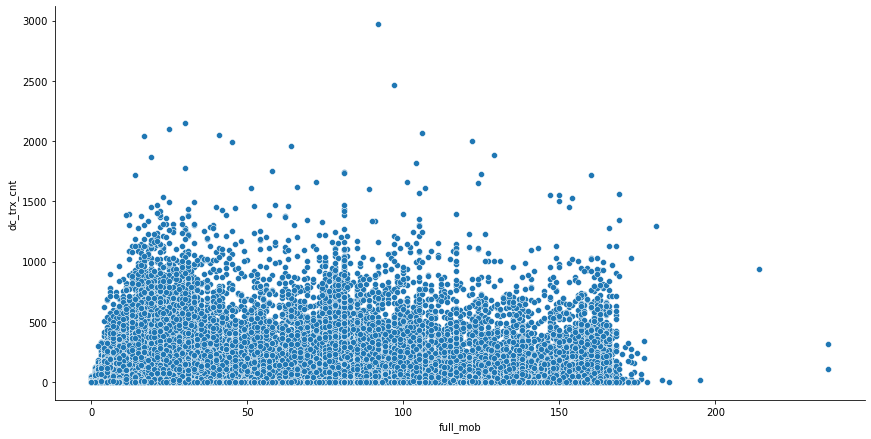

In [12]:
sns.relplot(
    y='dc_trx_cnt',
    x='full_mob',
    data=df, height=6,
    aspect=2
#     kind='scatter'
#     kind='line'
);

<AxesSubplot:>

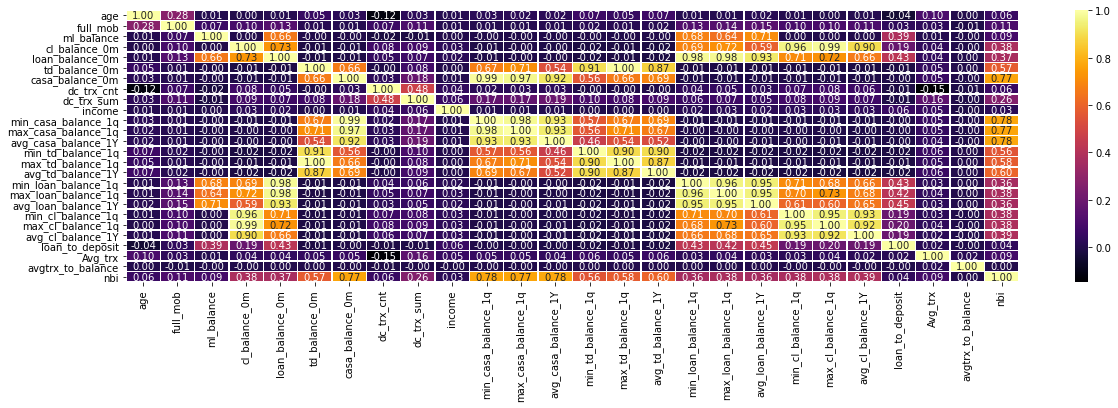

In [13]:
corr = df.corr()
plt.figure(figsize=(20,5))
sns.heatmap(corr, annot=True, fmt='.2f',linewidths=.5, cmap="inferno")

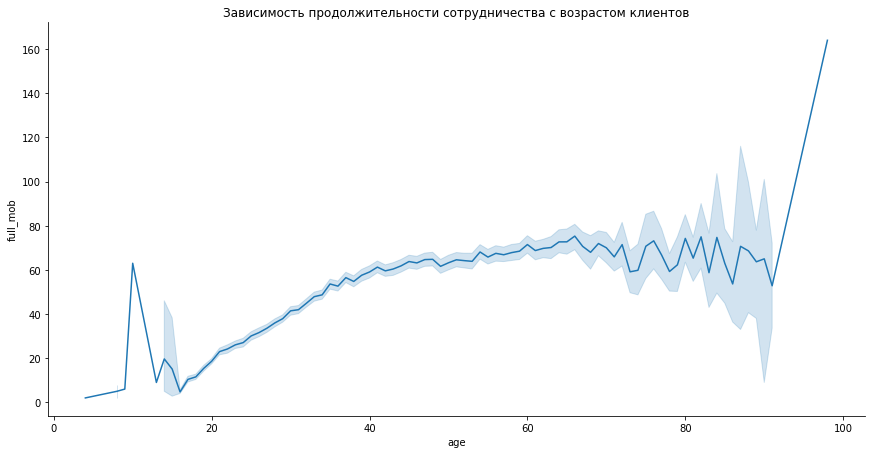

In [14]:
sns.relplot(
    x='age',
    y='full_mob',
    data=df, height=6,
    aspect=2,
    kind='line'
)
plt.title('Зависимость продолжительности сотрудничества с возрастом клиентов');

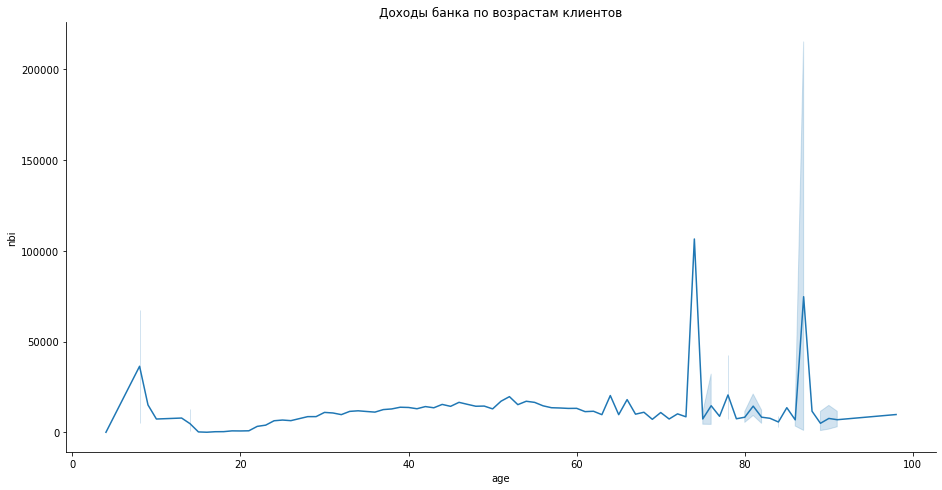

In [15]:
sns.relplot(
    x='age',
    y='nbi',
    data=df, height=6.5,
    aspect=2,
    kind='line'
)
plt.title('Доходы банка по возрастам клиентов');

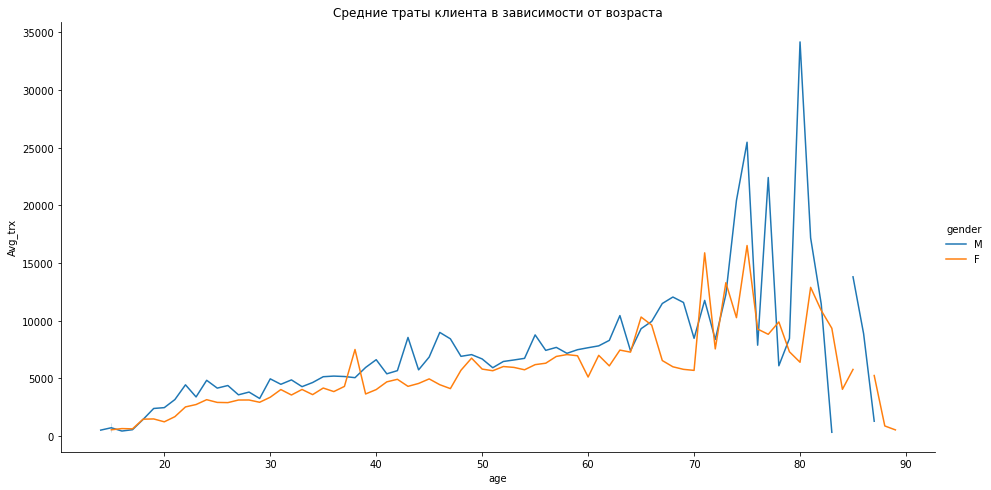

In [16]:
sns.relplot(
    x='age',
    y='Avg_trx',
    data=df, height=6.5,
    hue='gender',
    aspect=2,
    kind='line'
)
plt.title('Средние траты клиента в зависимости от возраста');

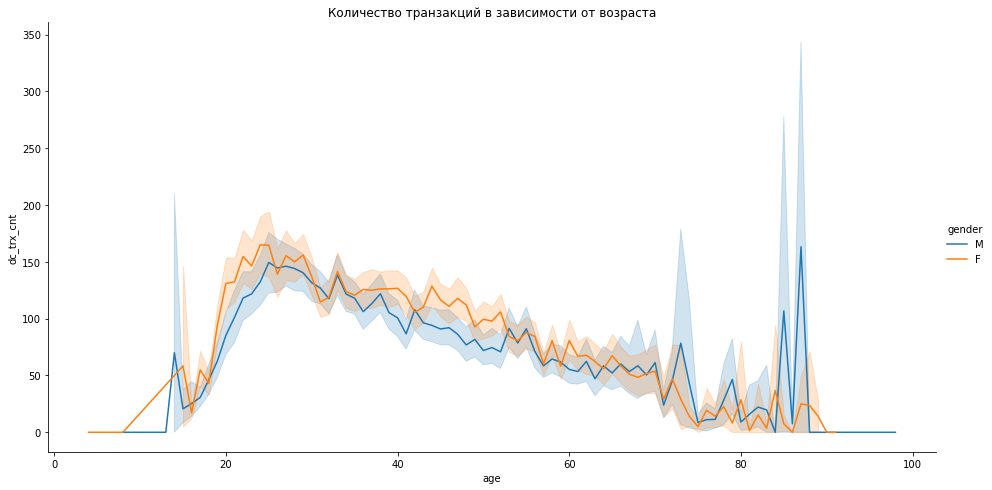

In [17]:
sns.relplot(
    x='age',
    y='dc_trx_cnt',
    data=df, height=6.5,
    hue='gender',
    aspect=2,
    kind='line'
)
plt.title('Количество транзакций в зависимости от возраста');

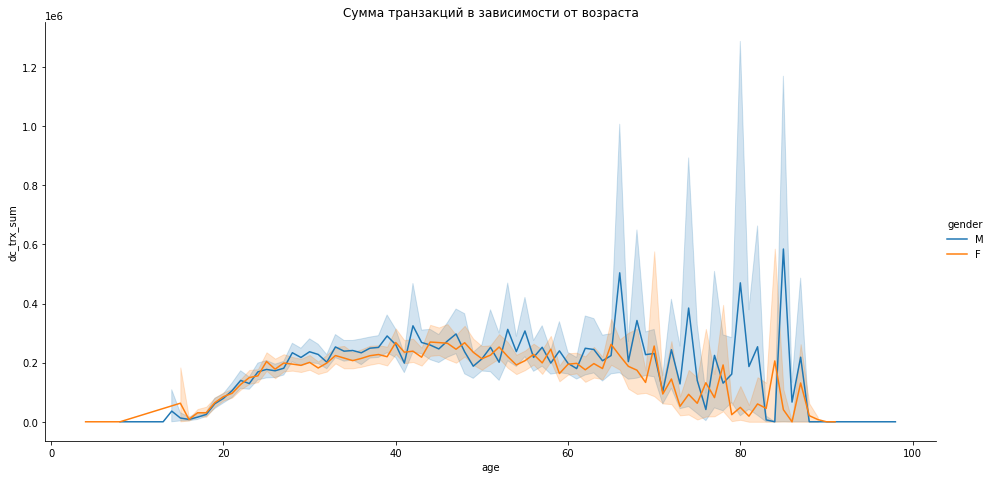

In [18]:
sns.relplot(
    x='age',
    y='dc_trx_sum',
    data=df, height=6.5,
    hue='gender',
    aspect=2,
    kind='line'
)
plt.title('Сумма транзакций в зависимости от возраста');

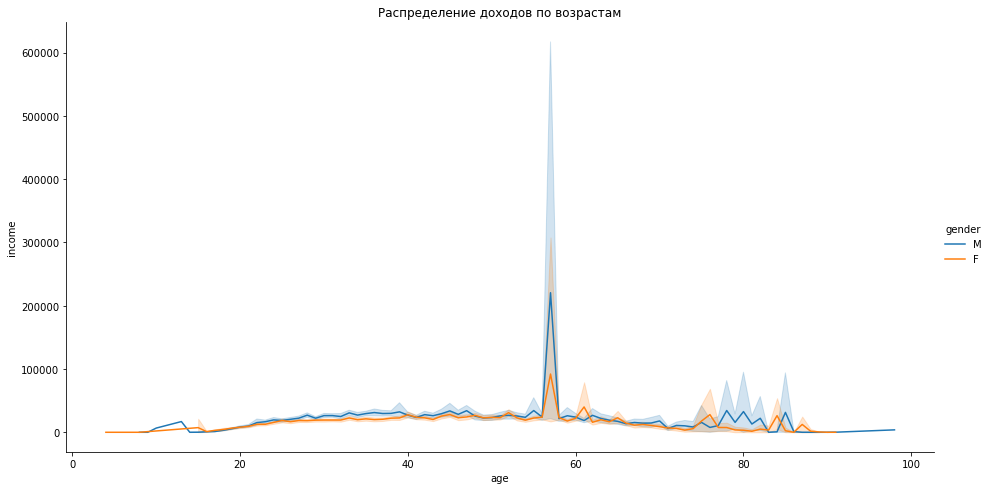

In [19]:
sns.relplot(
    x='age',
    y='income',
    data=df, height=6.5,
    hue='gender',
    aspect=2,
#     kind='scatter'
     kind='line'
)
plt.title('Распределение доходов по возрастам');

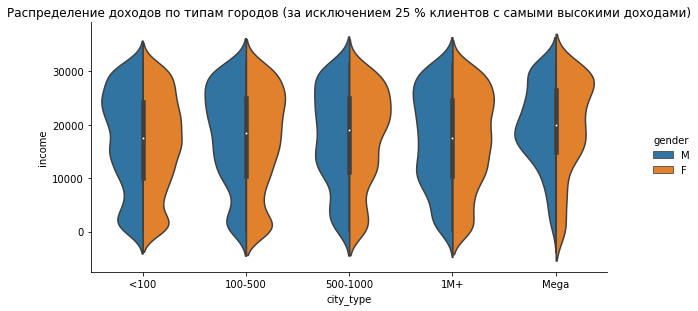

In [20]:
sns.catplot(
    x='city_type', 
    y='income', 
    data=df.query('income!=0&income<=3.162002e+04'), 
    kind='violin',
    hue='gender',
    split=True,
    order=city_cat,
    height=4, 
    aspect=2)
plt.title('Распределение доходов по типам городов (за исключением 25 % клиентов с самыми высокими доходами)');

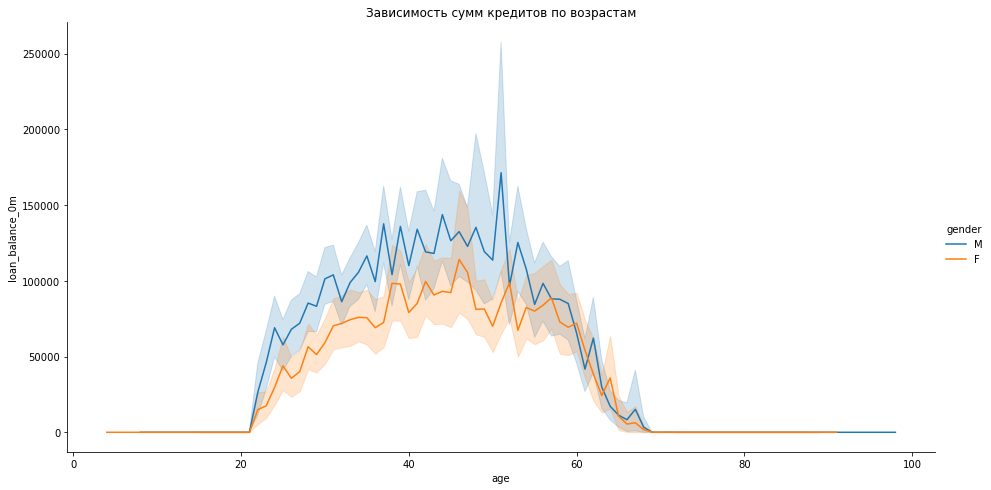

In [21]:
sns.relplot(
    x='age',
    y='loan_balance_0m',
    data=df, height=6.5,
    hue='gender',
#    style='city_type',
    aspect=2,
#     kind='scatter'
     kind='line'
)
plt.title('Зависимость сумм кредитов по возрастам');

In [22]:
df['gender'] = df['gender'].map({'F': 0, 'М': 1})
df['city_type'] = df['city_type'].map({'<100': 0, '100-500': 1, '500-1000': 2, '1M+': 3, 'Mega': 4})
df

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,0,103,0.0,0.0,0.00,0.0,0.0000,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,4,81,0.0,0.0,0.00,0.0,3272.9367,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,4,81,0.0,0.0,0.00,0.0,6249.7550,6,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,854.670000,0.083467,1973.335539
3,47,NaN,4,81,0.0,0.0,0.00,0.0,14354.9370,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,4,81,0.0,0.0,0.00,0.0,91511.7691,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,57,0.0,0,97,0.0,0.0,0.00,1247018.0,0.8800,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,13775.933155
49996,58,0.0,4,34,0.0,0.0,0.00,1000000.0,0.0000,0,...,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,8247.466438
49997,34,1.0,3,21,0.0,0.0,0.00,0.0,6450.9300,73,...,0.00,0.00,0.000000,0.0,0.0,0.0,NaN,1621.347671,0.179949,1973.128711
49998,43,1.0,0,52,0.0,0.0,39318.52,0.0,4101.1200,0,...,39318.52,48453.57,63442.406667,0.0,0.0,0.0,NaN,NaN,NaN,5101.543269


In [28]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage

df.dropna(inplace=True)
X = df.values
X_scaled = StandardScaler().fit_transform(X)
X_scaled.shape

(100, 28)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1642 entries, 10 to 49952
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1642 non-null   int64  
 1   gender               1642 non-null   float64
 2   city_type            1642 non-null   int64  
 3   full_mob             1642 non-null   int64  
 4   ml_balance           1642 non-null   float64
 5   cl_balance_0m        1642 non-null   float64
 6   loan_balance_0m      1642 non-null   float64
 7   td_balance_0m        1642 non-null   float64
 8   casa_balance_0m      1642 non-null   float64
 9   dc_trx_cnt           1642 non-null   int64  
 10  dc_trx_sum           1642 non-null   float64
 11  income               1642 non-null   float64
 12  min_casa_balance_1q  1642 non-null   float64
 13  max_casa_balance_1q  1642 non-null   float64
 14  avg_casa_balance_1Y  1642 non-null   float64
 15  min_td_balance_1q    1642 non-null  

In [29]:
Z = linkage(X)

{'icoord': [[105.0, 105.0, 115.0, 115.0],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [255.0, 255.0, 265.0, 265.0],
  [315.0, 315.0, 325.0, 325.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [320.0, 320.0, 342.5, 342.5],
  [305.0, 305.0, 331.25, 331.25],
  [295.0, 295.0, 318.125, 318.125],
  [285.0, 285.0, 306.5625, 306.5625],
  [375.0, 375.0, 385.0, 385.0],
  [365.0, 365.0, 380.0, 380.0],
  [405.0, 405.0, 415.0, 415.0],
  [395.0, 395.0, 410.0, 410.0],
  [372.5, 372.5, 402.5, 402.5],
  [295.78125, 295.78125, 387.5, 387.5],
  [465.0, 465.0, 475.0, 475.0],
  [455.0, 455.0, 470.0, 470.0],
  [555.0, 555.0, 565.0, 565.0],
  [595.0, 595.0, 605.0, 605.0],
  [585.0, 585.0, 600.0, 600.0],
  [575.0, 575.0, 592.5, 592.5],
  [560.0, 560.0, 583.75, 583.75],
  [545.0, 545.0, 571.875, 571.875],
  [535.0, 535.0, 558.4375, 558.4375],
  [525.0, 525.0, 546.71875, 546.71875],
  [515.0, 515.0, 535.859375, 535.859375],
  [505.0, 505.0, 525.4296875, 525.4296875],


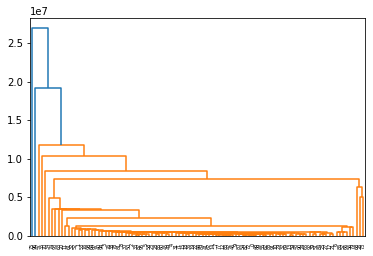

In [30]:
dendrogram(Z)

In [37]:
df[df.nbi.notnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47569 entries, 1 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  47569 non-null  int64  
 1   gender               46910 non-null  object 
 2   city_type            47569 non-null  object 
 3   full_mob             47569 non-null  int64  
 4   ml_balance           47569 non-null  float64
 5   cl_balance_0m        47569 non-null  float64
 6   loan_balance_0m      47569 non-null  float64
 7   td_balance_0m        47569 non-null  float64
 8   casa_balance_0m      47569 non-null  float64
 9   dc_trx_cnt           47569 non-null  int64  
 10  dc_trx_sum           47569 non-null  float64
 11  income               47569 non-null  float64
 12  min_casa_balance_1q  47569 non-null  float64
 13  max_casa_balance_1q  47569 non-null  float64
 14  avg_casa_balance_1Y  47569 non-null  float64
 15  min_td_balance_1q    47569 non-null 

In [40]:
df.pop('loan_to_deposit')

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
49995    0.0
49996    0.0
49997    NaN
49998    NaN
49999    NaN
Name: loan_to_deposit, Length: 50000, dtype: float64

In [42]:
df.dropna(inplace=True)
df.shape

(29424, 27)